### Modelling

In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_validate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")
import sklearn.metrics as metrics

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


In [2]:
df_ = pd.read_csv("sentiment_label_data.csv")

In [20]:
df_.dropna(inplace = True)

In [21]:
df = df_.copy()
df = df[["user_location","date","text","polarity_score","sentiment_label"]]

In [22]:
df.head()

,user_location,date,text,polarity_score,sentiment_label
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive


### Feature Engineering


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
### TF-IDF ###
vectorizer = TfidfVectorizer(max_features=2000, max_df = 0.90, min_df = 10, stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(df['text'].values).toarray()

In [25]:
# Categoric label convert to numeric value
df["sentiment_label_encoding"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [26]:
df.head()

,user_location,date,text,polarity_score,sentiment_label,sentiment_label_encoding
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral,1
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive,2
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive,2
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive,2
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive,2


In [27]:
# 0: negative
# 1: neutral
# 2: positive

In [28]:
X = features # independent variable
y = df["sentiment_label"] # dependent variable

In [29]:
df.head()

,user_location,date,text,polarity_score,sentiment_label,sentiment_label_encoding
0,United States,2020-12-08,removed cfo chieffinancialofficer wonder makin...,0.00,neutral,1
1,United States,2020-12-08,one trusting gate amp fauci amp mandate yall b...,0.68,positive,2
2,India,2020-12-08,putin daughter vaccinated first approved vacci...,0.42,positive,2
3,India,2020-12-08,marketwatch putin daughter vaccinated st appro...,0.42,positive,2
4,India,2020-12-08,abc debrobertsabc natgeo putin daughter vaccin...,0.42,positive,2


In [30]:
# The model is installed on the train set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['sentiment_label'].values, test_size=0.20, random_state=42)

In [31]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
df['sentiment_label']

0         neutral
1        positive
2        positive
3        positive
4        positive
           ...   
17618    positive
17619     neutral
17620    positive
17621    positive
17622    positive
Name: sentiment_label, Length: 17623, dtype: object

### Multi Logistic Regression

In [33]:
model_multilog_reg = LogisticRegression(random_state=1, multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

#### Success Evaluation

In [34]:
y_pred = model_multilog_reg.predict(X_train)

In [35]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.8723932472691162


In [36]:
# test
y_prob = model_multilog_reg.predict_proba(X_test)[:,1]

In [37]:
# y_pred for other metrics
y_pred = model_multilog_reg.predict(X_test)

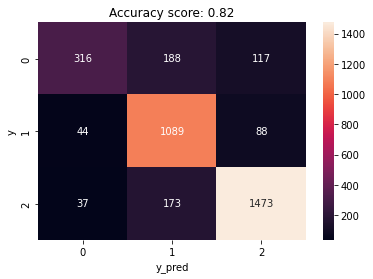

In [38]:

# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [39]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8164539007092199


In [40]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.8194892160062097


In [41]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8164539007092199


In [42]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.8103142052806553


In [43]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    negative       0.80      0.51      0.62       621
     neutral       0.75      0.89      0.82      1221
    positive       0.88      0.88      0.88      1683

    accuracy                           0.82      3525
   macro avg       0.81      0.76      0.77      3525
weighted avg       0.82      0.82      0.81      3525



### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# RF Trial:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 1)

In [46]:
rf_model = rf.fit(X_train,y_train)

In [47]:
# test accuracy
y_pred = rf_model.predict(X_test)

In [48]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8039716312056737


In [49]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))

Precision Score: 0.8237286950147258


In [50]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8039716312056737


In [51]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.7959791231283259


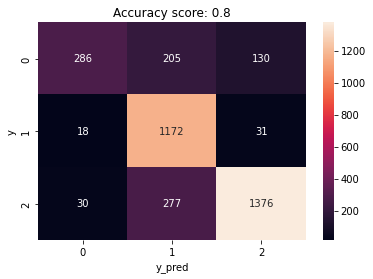

In [52]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [53]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    negative       0.86      0.46      0.60       621
     neutral       0.71      0.96      0.82      1221
    positive       0.90      0.82      0.85      1683

    accuracy                           0.80      3525
   macro avg       0.82      0.75      0.76      3525
weighted avg       0.82      0.80      0.80      3525



## Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
clf = MultinomialNB().fit(X_train, y_train)

In [56]:
y_pred = clf.predict(X_train)

In [57]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.7828060717832317


In [58]:
# test
y_prob = clf.predict_proba(X_test)[:,1]

In [59]:
# y_pred for other metrics
y_pred = clf.predict(X_test)

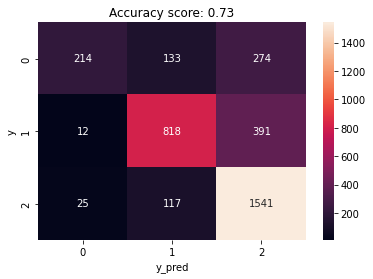

In [60]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [61]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.7299290780141844


In [62]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.749021906040851


In [63]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.7299290780141844


In [64]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.7124092100637126


In [65]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    negative       0.85      0.34      0.49       621
     neutral       0.77      0.67      0.71      1221
    positive       0.70      0.92      0.79      1683

    accuracy                           0.73      3525
   macro avg       0.77      0.64      0.67      3525
weighted avg       0.75      0.73      0.71      3525



## Ridge

In [66]:
from sklearn.linear_model import RidgeClassifier

In [67]:
clf = RidgeClassifier().fit(X_train, y_train)

In [68]:
y_pred = clf.predict(X_train)

In [69]:
print('Train Accuracy Score:', metrics.accuracy_score(y_train, y_pred))

Train Accuracy Score: 0.8784934033196198


In [70]:
# y_pred for other metrics
y_pred = clf.predict(X_test)

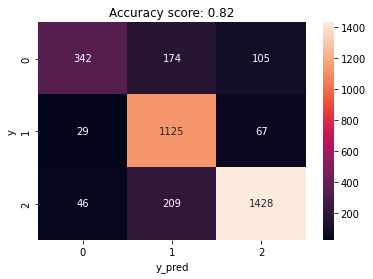

In [71]:
# Confusion Matrix
def plot_confision_matrix(y, y_red):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot = True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy score: {0}".format((acc), size=10))
    plt.show()

plot_confision_matrix(y_test, y_pred)

In [72]:
print('Test Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.8212765957446808


In [73]:
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='weighted'))
# average parameter neccessary for multi class label 

Precision Score: 0.8290152517254779


In [74]:
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='weighted'))

Recall Score: 0.8212765957446808


In [75]:
print('F1-Score Score:', metrics.f1_score(y_test, y_pred, average='weighted'))

F1-Score Score: 0.8170223119267128


In [76]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    negative       0.82      0.55      0.66       621
     neutral       0.75      0.92      0.82      1221
    positive       0.89      0.85      0.87      1683

    accuracy                           0.82      3525
   macro avg       0.82      0.77      0.78      3525
weighted avg       0.83      0.82      0.82      3525

